# Läser in data aktiva kunder

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("ActiveMembers_clean.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,0.00,1,1,1,101348.88
1,15647311,Hill,608,Spain,Female,41,83807.86,1,0,1,112542.58
2,15737888,Mitchell,850,Spain,Female,43,125510.82,1,1,1,79084.10
3,15592531,Bartlett,822,France,Male,50,0.00,2,1,1,10062.80
4,15792365,He,501,France,Male,44,142051.07,2,0,1,74940.50


## Kontrollerar antal rader och kolummner

In [2]:
df.shape

(4951, 11)

# Vart har vi flest kunder?

In [3]:
df["Geography"].value_counts()

France     2485
Spain      1262
Germany    1204
Name: Geography, dtype: int64

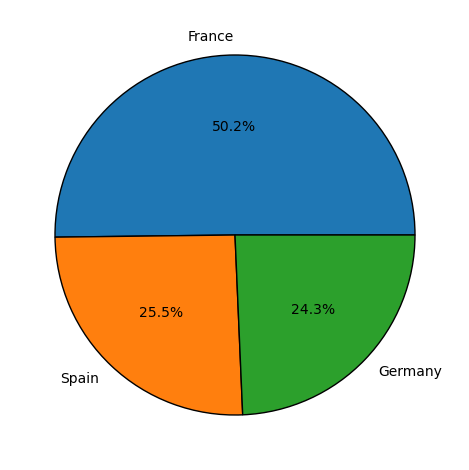

In [4]:
countries = dict(df["Geography"].value_counts())
plt.pie(countries.values(),labels=countries.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.tight_layout()

## Printa ut creditscore

In [5]:
df["CreditScore"].value_counts()

850    121
678     35
682     33
670     31
684     29
      ... 
432      1
410      1
405      1
428      1
845      1
Name: CreditScore, Length: 440, dtype: int64

In [6]:
CreditScore=df[df["CreditScore"]==850]
print(CreditScore)

      CustomerId     Surname  CreditScore Geography  Gender  Age    Balance  \
2       15737888    Mitchell          850     Spain  Female   43  125510.82   
21      15717426   Armstrong          850    France    Male   36       0.00   
85      15716334      Rozier          850     Spain  Female   45  122311.21   
94      15604482   Chiemezie          850     Spain    Male   30  141040.01   
126     15607178       Welch          850   Germany    Male   38   54901.01   
...          ...         ...          ...       ...     ...  ...        ...   
4689    15672574  Uspenskaya          850     Spain  Female   32       0.00   
4712    15682868     Elliott          850    France  Female   40   99816.46   
4716    15581551  Yobachukwu          850     Spain    Male   41  132838.07   
4737    15709256      Glover          850    France  Female   28       0.00   
4790    15730579        Ward          850    France    Male   68  169445.40   

      NumOfProducts  HasCrCard  IsActiveMember  Est

# Vilken kön har våra kunder? 

In [7]:
df["Gender"].value_counts()

Male      2747
Female    2204
Name: Gender, dtype: int64

# Hur gamla är våra kunder? 

In [8]:
df["Age"].value_counts()

35    236
37    233
32    232
38    222
36    214
     ... 
88      1
85      1
84      1
92      1
83      1
Name: Age, Length: 70, dtype: int64

In [9]:
age=df.loc[df["IsActiveMember"]==1]

## skapar ett histogram över ålder

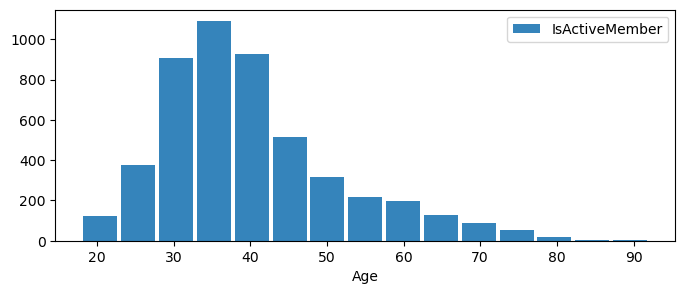

In [10]:
plt.figure(figsize=(8,3))
plt.xlabel('Age')
plt.hist(age["Age"],bins=15, alpha=0.9, label='IsActiveMember',rwidth=0.9)
plt.legend(loc='upper right')
plt.show()

## översikt över åldersdatan

In [11]:
age["Age"].describe()

count    4951.000000
mean       39.774389
std        11.655414
min        18.000000
25%        32.000000
50%        37.000000
75%        45.000000
max        92.000000
Name: Age, dtype: float64

## Hur många produkter har våra kunder?

In [12]:
df["NumOfProducts"].value_counts()

1    2473
2    2340
3     109
4      29
Name: NumOfProducts, dtype: int64

## Printa ut max balance 

In [13]:
print(df["Balance"].max())

250898.09


# Vilka 5 är vår största kunder

In [14]:
# Sort the DataFrame by the 'Balance' column in descending order
df_active_sorted = df.sort_values(by='Balance', ascending=False)


# Print the top 5 rows, representing the 5 biggest customers
top_5_customers=df_active_sorted.head(5)
print(top_5_customers)

      CustomerId    Surname  CreditScore Geography  Gender  Age    Balance  \
1024    15757408         Lo          655     Spain    Male   38  250898.09   
3294    15586674       Shaw          663     Spain  Female   58  216109.88   
745     15769818      Moore          850    France  Female   37  212778.20   
4295    15690589    Udinesi          541    France    Male   37  212314.03   
3622    15736420  Macdonald          596    France    Male   21  210433.08   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
1024              3          0               1         81054.00  
3294              1          0               1         74176.71  
745               1          0               1         69372.88  
4295              1          0               1        148814.54  
3622              2          0               1        197297.77  


In [15]:
df['Surname'].replace("H?", "", inplace=True)  # Tar bort `L?`